In [5]:
import matplotlib.pyplot as plt
import numpy as np
import sympy as sp
import scipy
from IPython.display import display, Latex

In [6]:

t, x = sp.symbols("t, x")

a = 1
b = 3

n = 2

T = 5

c = 1

C= 5

L = lambda y: sp.diff(y, t) - c * sp.diff(y, x)

L_0 = [lambda y: y, lambda y: sp.diff(y, x)]

L_G = [lambda y: y]

H = sp.Piecewise((0, t <= 0), (1, t > 0))

G = H.subs({t: t - abs(x) / c}) / 2 / c

y_expr = x + (t - 1) ** 2


zero = np.random.uniform(0.0001, 9.0002)

In [7]:
def cartesian_product(x, y):
    return np.dstack(np.meshgrid(x, y)).reshape(-1, 2)

In [8]:
eps = np.random. uniform(0.0001,0.0002)

S = np.linspace(a, b, n)
time = np.linspace(0, T, n)
S_T = cartesian_product(S, time)

pre_time = np.linspace(-C, -eps, n)
S_0 = cartesian_product(S, pre_time)

pre_space = np.linspace(a - c, a - eps, n)

post_space = np.linspace(b + eps, b + c, n)

out_space = np.concatenate((pre_space, post_space), axis=0)
S_G = cartesian_product(out_space, time)

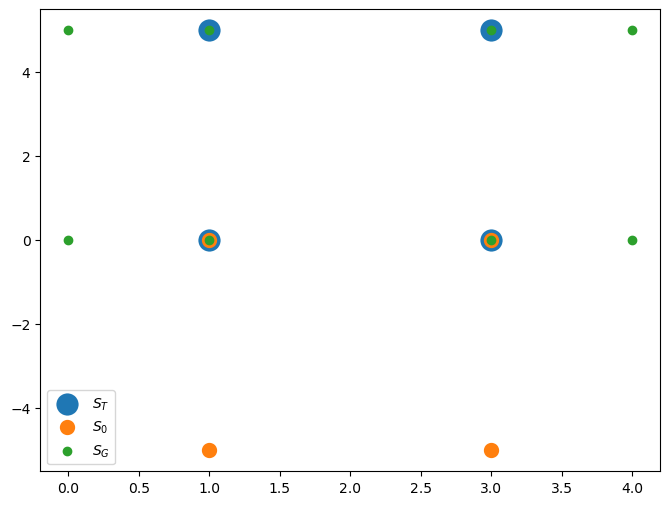

In [9]:
plt.figure(figsize=(8, 6))
plt.scatter(S_T[:, 0], S_T[:, 1], label="$S_T$", linewidths=10)
plt.scatter(S_0[:, 0], S_0[:, 1], label="$S_0$", linewidths=5)
plt.scatter(S_G[:, 0], S_G[:, 1], label="$S_G$")
plt.legend()
plt.show()

$\begin{aligned} & B_{11}(x)=\operatorname{col}\left(\operatorname{str}\left(\left.L_r^0\left(\partial_t\right) G\left(s-s_m^0\right)\right|_{t=0}, m=\overline{1, M_0}\right), r=\overline{1, R_0}\right), \\ & B_{12}(x)=\operatorname{col}\left(\operatorname{str}\left(\left.L_r^0\left(\partial_t\right) G\left(s-s_m^{\Gamma}\right)\right|_{t=0}, m=\overline{1, M_{\Gamma}}\right), r=\overline{1, R_0}\right), \\ & B_{21}(x, t)=\operatorname{col}\left(\operatorname{str}\left(L_\rho^{\Gamma}\left(\partial_x\right) G\left(s-s_m^0\right), m=\overline{1, M_0}\right), \rho=\overline{1, R_{\Gamma}}\right), \\ & B_{22}(x, t)=\operatorname{col}\left(\operatorname{str}\left(L_\rho^{\Gamma}\left(\partial_x\right) G\left(s-s_m^{\Gamma}\right), m=\overline{1, M_{\Gamma}}\right), \rho=\overline{1, R_{\Gamma}}\right) .\end{aligned}$

In [10]:
r_0, m_0 = len(L_0), len(S_0)
B_11 = np.zeros((r_0, m_0)).tolist()

for i in range(r_0):
    for j in range(m_0):
        s_x, s_t = S_0[j]
        expr = L_0[i](G.subs([(x, x - s_x), (t, t - s_t)])).subs(t, zero)
        B_11[i][j] = expr

B_11 = sp.Matrix(B_11)
B_11

Matrix([
[Piecewise((0, Abs(x - 1.0) - 7.9450739202968 >= 0), (1, True))/2, Piecewise((0, Abs(x - 3.0) - 7.9450739202968 >= 0), (1, True))/2, Piecewise((0, Abs(x - 1.0) - 2.94519507062479 >= 0), (1, True))/2, Piecewise((0, Abs(x - 3.0) - 2.94519507062479 >= 0), (1, True))/2],
[                                                               0,                                                                0,                                                                 0,                                                                 0]])

In [11]:
r_0, m_0 = len(L_0), len(S_G)
B_12 = np.zeros((r_0, m_0)).tolist()

for i in range(r_0):
    for j in range(m_0):
        s_x, s_t = S_G[j]
        expr = L_0[i](G.subs([(x, x - s_x), (t, t - s_t)])).subs(t, zero)
        B_12[i][j] = expr

B_12 = sp.Matrix(B_12)
B_12

Matrix([
[Piecewise((0, Abs(x) - 2.9450739202968 >= 0), (1, True))/2, Piecewise((0, Abs(x - 0.999878849672012) - 2.9450739202968 >= 0), (1, True))/2, Piecewise((0, Abs(x - 3.00012115032799) - 2.9450739202968 >= 0), (1, True))/2, Piecewise((0, Abs(x - 4.0) - 2.9450739202968 >= 0), (1, True))/2, 0, 0, 0, 0],
[                                                         0,                                                                              0,                                                                             0,                                                                0, 0, 0, 0, 0]])

In [12]:
r_G, m_0 = len(L_G), len(S_0)
B_21 = np.zeros((r_G, m_0)).tolist()
for i in range(r_G):
    for j in range(m_0):
        s_x, s_t = S_0[j]
        expr = L_G[i](G.subs([(x, x - s_x), (t, t - s_t)]))
        B_21[i][j] = expr

B_21 = sp.Matrix(B_21)
B_21

Matrix([[Piecewise((0, t - Abs(x - 1.0) + 5.0 <= 0), (1, True))/2, Piecewise((0, t - Abs(x - 3.0) + 5.0 <= 0), (1, True))/2, Piecewise((0, t - Abs(x - 1.0) + 0.000121150327987578 <= 0), (1, True))/2, Piecewise((0, t - Abs(x - 3.0) + 0.000121150327987578 <= 0), (1, True))/2]])

In [13]:
r_G, m_G = len(L_G), len(S_G)
B_22 = np.zeros((r_G, m_G)).tolist()
for i in range(r_G):
    for j in range(m_G):
        sx, st = S_G[j]
        expr = L_G[i](G.subs([(x, x - s_x), (t, t - s_t)]))
        B_22[i][j] = expr
B_22 = sp.Matrix(B_22)
B_22

Matrix([[Piecewise((0, t - Abs(x - 3.0) + 0.000121150327987578 <= 0), (1, True))/2, Piecewise((0, t - Abs(x - 3.0) + 0.000121150327987578 <= 0), (1, True))/2, Piecewise((0, t - Abs(x - 3.0) + 0.000121150327987578 <= 0), (1, True))/2, Piecewise((0, t - Abs(x - 3.0) + 0.000121150327987578 <= 0), (1, True))/2, Piecewise((0, t - Abs(x - 3.0) + 0.000121150327987578 <= 0), (1, True))/2, Piecewise((0, t - Abs(x - 3.0) + 0.000121150327987578 <= 0), (1, True))/2, Piecewise((0, t - Abs(x - 3.0) + 0.000121150327987578 <= 0), (1, True))/2, Piecewise((0, t - Abs(x - 3.0) + 0.000121150327987578 <= 0), (1, True))/2]])

In [14]:
def int_S(M):
    n, m = sp.shape(M)
    X = np.zeros((n, m))
    for i in range(n):
        for j in range(m):
            X[i][j] = scipy.integrate.quad(lambda x1: M[i, j].subs({x:x1}).evalf(), a, b)[0]
    return X

In [15]:
def int_G(M):
    n, m = sp.shape(M)
    X = np.zeros((n, m))
    for i in range(n):
        for j in range(m):
            f = lambda x_val, t_val: M[i, j].subs({x: x_val, t: t_val}).evalf()
            val1 = scipy.integrate.quad(lambda t: f(a, t), zero, T)[0]
            val2 = scipy.integrate.quad(lambda t: f(b, t), zero, T)[0]
            X[i][j] = val1 + val2
    return X

$\begin{gathered}P_{i j}=\int_{S_0} B_{1 i}^T(x) B_{1 j}(x) d x+\int_{\Gamma \times[0, T]} B_{2 i}^T(x, t) B_{2 j}(x, t) d x d t \\ B_{y i}=\int_{S_0} B_{1 i}^T(x) Y_0(x) d x+\int_{\Gamma \times[0, T]} B_{2 i}^T(x, t) Y_{\Gamma}(x, t) d x d t \quad(i, j=\overline{1,2}) .\end{gathered}$

In [16]:
P = np.zeros((2, 2)).tolist()

In [17]:
part_1 = B_11.T * B_11; part_1.simplify()
part_2 = B_21.T * B_21; part_2.simplify()

In [18]:
P[0][0] = int_S(part_1) + int_G(part_2)

In [19]:
part_1 = B_11.T * B_12; part_1.simplify()
part_2 = B_21.T * B_22; part_2.simplify()

In [20]:
P[0][1] = int_S(part_1) + int_G(part_2)

In [21]:
part_1 = B_12.T * B_11; part_1.simplify()
part_2 = B_22.T * B_21; part_2.simplify()

In [22]:
P[1][0] = int_S(part_1) + int_G(part_2)

In [23]:
part_1 = B_12.T * B_12; part_1.simplify()
part_2 = B_22.T * B_22; part_2.simplify()

In [24]:
P[1][1] = int_S(part_1) + int_G(part_2)

In [25]:
#B = [[B_11, B_12], [B_21, B_22]]
#P = np.zeros((2, 2)).tolist()
#for i in range(2):
#    for j in range(2):
#        p_1 = B[0][i].T * B[0][j]; p_1.simplify()
#        p_2 = B[1][i].T * B[1][j]; p_2.simplify()
#        P[i][j] = int_S(p_1) + int_G(p_2)

In [26]:
u = sp.lambdify([x, t], L(y_expr))
y_inf = sum([G.subs({x: x - s_x, t: t - s_t}) * u(s_x, s_t) for (s_x, s_t) in S_T])
_Y_r_0 = [sp.sin(x), sp.cos(x)]
_Y_G = [sp.cos(t)]
_Y_r_0 = sp.Matrix(_Y_r_0)
_Y_G = sp.Matrix(_Y_G)
Y = [_Y_r_0, _Y_G]
B_y = np.zeros((2, 1)).tolist()

In [27]:
part_1 = B_11.T * Y[0]
part_2 = B_21.T * Y[1]
B_y[0] = int_S(part_1) + int_G(part_2)

In [28]:
part_1 = B_12.T * Y[0]
part_2 = B_22.T * Y[1]
B_y[1] = int_S(part_1) + int_G(part_2)

In [29]:
P_1 = np.concatenate((P[0][0], P[0][1]), axis=1)
P_2 = np.concatenate((P[1][0], P[1][1]), axis=1)
P_new = np.concatenate((P_1, P_2), axis=0)

In [30]:
P_pinv = sp.Matrix(np.linalg.pinv(P_new))

In [31]:
P_new = sp.Matrix(P_new)

In [32]:
B_y_new = sp.Matrix(np.concatenate((B_y[0], B_y[1]), axis=0))

$\bar{u} \in \Omega_u=\left\{u: u=P^{+} B_y+v-P^{+} P v, \quad \forall v \in R^{M_0+M_r}\right\}$

In [33]:
v = 0
_u = P_pinv * B_y_new

In [34]:
_u

Matrix([
[0.0814187586536568],
[0.0814187586536308],
[0.0814187586536307],
[0.0814187586536321],
[  1.22325247324385],
[0.0814187586536321],
[0.0814187586536321],
[-0.152051785091352],
[-0.670760926516178],
[-0.670760926516178],
[-0.670760926516178],
[-0.670760926516178]])

In [35]:
M_0 = len(S_0)
u_0, u_G = _u[:M_0], _u[M_0:]

In [36]:
u_0

[0.0814187586536568,
 0.0814187586536308,
 0.0814187586536307,
 0.0814187586536321]

In [37]:
u = sp.lambdify([x, t], L(y_expr))
y_inf = sum([G.subs({x: x - s_x, t: t - s_t}) * u(s_x, s_t) for (s_x, s_t) in S_T])
M_0 = len(S_0)
M_G = len(S_G)

y_0 = 0
for i in range(M_0):
    y_0 += u_0[i] * G.subs({x: x - S_0[i][0], t: t - S_0[i][1]})

y_G = 0
for i in range(M_G):
    y_G += u_G[i] * G.subs({x: x - S_G[i][0], t: t - S_G[i][1]})

In [38]:
y = y_inf + y_0 + y_G

In [39]:
y_f = lambda x_val, t_val: y.subs({x: x_val, t: t_val}).evalf()

In [40]:
x_data = np.linspace(a, b, 50)
t_data = np.linspace(0, T, 50) 

In [41]:
function_y = np.vectorize(y_f)

In [59]:
X, Y = np.meshgrid(x_data, t_data)
Z = function_y(X, Y)

In [57]:
Z= np.matrix(Z, dtype=float)

Text(0.5, 0, 'z')

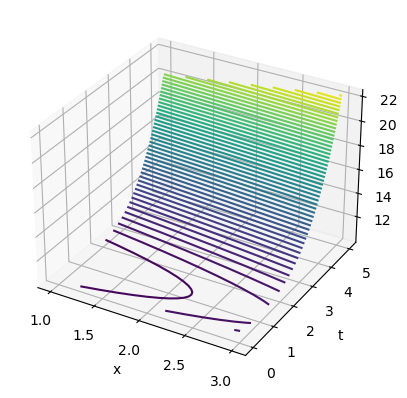

In [58]:
fig = plt.figure()

ax = plt.axes(projection='3d')
ax.contour3D(X, Y, Z, 50)
ax.set_xlabel('x')
ax.set_ylabel('t')
ax.set_zlabel('z')

In [46]:
real_y = lambda x_val, t_val: y_expr.subs({x: x_val, t: t_val}).evalf()
real_y = np.vectorize(real_y)

In [47]:
X, Y = np.meshgrid(x_data, t_data)
Z = real_y(X, Y)

In [48]:
Z= np.matrix(Z, dtype=float)

Text(0.5, 0, 'z')

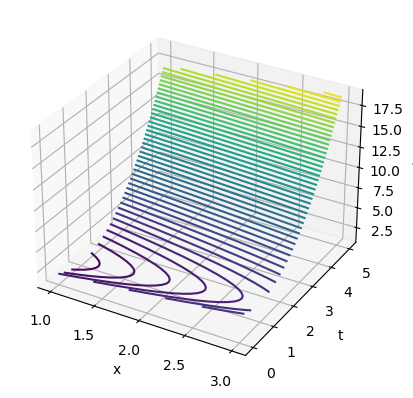

In [49]:
fig = plt.figure()

ax = plt.axes(projection='3d')
ax.contour3D(X, Y, Z, 50)
ax.set_xlabel('x')
ax.set_ylabel('t')
ax.set_zlabel('z')